# Activity: Build an XGBoost model

## Introduction

In this activity, you’ll build on the skills and techniques you learned in the decision tree and random forest lessons to construct your own XGBoost classification model. The XGBoost model is a very powerful extension of decision trees, so having a strong working familiarity with this process will strengthen your skills and resume as a data professional.

This activity is a continuation of the airlines project in which you built decision tree and random forest models. You will use the same data, but this time you will train, tune, and evaluate an XGBoost model. You’ll then compare the performance of all three models and decide which model is best. Finally, you’ll explore the feature importances of your model and identify the features that most contribute to customer satisfaction.


## Step 1: Imports

### Import packages

Begin with your import statements. First, import `pandas`, `numpy`, and `matplotlib` for data preparation. Next, import scikit-learn (`sklearn`) for model preparation and evaluation. Then, import `xgboost`, which provides the classification algorithm you'll implement to formulate your predictive model.

In [37]:
# Import relevant libraries and modules.

### YOUR CODE HERE ###
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from xgboost import plot_importance

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.model_selection import GridSearchCV, train_test_split, PredefinedSplit
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import metrics

import pickle

### Load the dataset

To formulate your model, `pandas` is used to import a csv of airline passenger satisfaction data called `Invistico_Airline.csv`. This DataFrame is called `airline_data`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [9]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

### YOUR CODE HERE ###
loc1 = '/home/gato/Scripts/DS/MachineLearning/dataAndPickles/Invistico_Airline.csv'
airline_data = pd.read_csv(loc1, on_bad_lines='skip')

### Display the data

Examine the first 10 rows of data to familiarize yourself with the dataset.

In [6]:
# Display the first ten rows of data.

### YOUR CODE HERE ###
airline_data.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,2,0,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,2,5,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,2,0,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,5,3,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,2,0,2,2,2,4,5,3,4,2,30,26.0


### Display the data type for each column

Next, observe the types of data present within this dataset.

In [5]:
# Display the data type for each column in your DataFrame.

### YOUR CODE HERE ###
airline_data.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall the methods for exploring DataFrames.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Recall a property of a `pandas` DataFrame that allows you to view the data type for each column.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `.dtypes` on your DataFrame `airline_data` to view the data type of each column.</details>

**Question:** Identify the target (or predicted) variable for passenger satisfaction. What is your initial hypothesis about which variables will be valuable in predicting satisfaction?

[Write your response here. Double-click (or enter) to edit.]

## Step 2: Model preparation

Before you proceed with modeling, consider which metrics you will ultimately want to leverage to evaluate your model.

**Question:** Which metrics are most suited to evaluating this type of model?

As is a classification problem were we are trying to predict a binary class
from the feature `satisfaction`,

therefore the metrics are:
`metrics = ['accuracy', 'precision', 'recall', 'f1']`

### Prepare your data for predictions

You may have noticed when previewing your data that there are several non-numerical variables (`object` data types) within the dataset.

To prepare this DataFrame for modeling, first convert these variables into a numerical format.

In [16]:
# Convert the object predictor variables to numerical dummies.

### YOUR CODE HERE ###
def str_encoder(dataframe, str_to_encode):
    """
    The str_encoder function will convert these columns 
    to numerical ordinal or binary numerical columns and 
    then return a new DataFrame with the transformed columns 
    plus the original columns that were not transformed.
    
    Arguments:
        df: A Pandas Data frame.
        str_to_encode: a list of columns to tranform 
        from the same data set.
    Returns:
        A new data set made of the transformed columns
        plus the original with out the previously transformed
        data.
    """
    ## make a copy 
    df_o = dataframe.copy()
    df_e = df_o[str_to_encode].copy()
    
    le = LabelEncoder()
    str_encoded = df_e.apply(le.fit_transform)

    ## Drop strings categories
    df_o_e = df_o.drop(str_to_encode, axis=1)

    ## Add transformed data
    full = df_o_e.join(str_encoded)
    
    return full

def observe_data_type(df: pd.DataFrame, max_class):

    """
    Args: 
        df(pd.DataFrame): a pdDataFrame.
        max_class: max number to be considered a categorical feature.
        Each case is different and EDA will tell.

    Returns:
        A new dataset with information related to unique values
        per column
    
    """
    # Running validation on the argument recieved
    assert type(df) == pd.DataFrame, f'{df}, is not a pandas df.'
    num_uniques = []
    column_name = []
    check = []
    resu = {}
    result = pd.DataFrame({})
    
    for c in df.columns:
        
        num_uniques.append(len(df[c].unique()))
        column_name.append(c)
        if 2 < len(df[c].unique()) < max_class:
            check.append('yes')
        else: check.append('no')
            
    
    result['columns_name'] = column_name
    result['Num_uniques'] = num_uniques
    result['possible_categorical'] = check
    return(result) 

def hot_encoder(dataframe, ordinal_to_hot_encode):
    
    """
    The hot_encoder function will convert the ordinal_to_hot_encode
    columns from numerical ordinal and then return a new DataFrame 
    with the transformed columns plus the original columns that were not transformed.
    
    Arguments:
        df: A Pandas Data frame.
        str_to_encode: a list of columns to tranform 
        from the same data set.
    Returns:
        A new data set made of the transformed columns
        plus the original with out the previously transformed
        data.
    """
    ## Original set copied
    original = dataframe.copy()
    
    ## Set minus the to be Transformed columns
    nums = original.drop(ordinal_to_hot_encode, axis=1)
    
    ## Transfomr to str
    str_encoded = original[ordinal_to_hot_encode].astype(str)

    ## Using get_dummies
    encoded_set = pd.get_dummies(str_encoded, dtype=int)
    
    ## Using join with the nums data set and encoded_set
    full = nums.join(encoded_set)
    
    return full

airline_data.dropna(inplace=True)
air_data_subset = airline_data.copy()

## Selecting columns to transform
cat_str = ['satisfaction','Customer Type','Type of Travel', 'Class']

## Encode the categorical objects data type data
encoded_string = str_encoder(air_data_subset, cat_str)

## Selecting categorical features to transform
info = observe_data_type(encoded_string, 10)

to_hot_encode = info.loc[info['possible_categorical'] == 'yes', :]['columns_name'].tolist()
to_hot_encode

air_data_subset_dummies = hot_encoder(encoded_string, to_hot_encode)

In [17]:
def get_unique_categories(dataframe, ordinal_to_hot_encode):
    original = dataframe.copy()
    ## Gets the categories, future use
    categories = [original[i].unique().astype(str) for i in ordinal_to_hot_encode]
    ## update categories to remove duplicates
    categories = [list(set(cat)) for cat in categories]
    return categories

In [20]:
get_unique_categories(encoded_string, to_hot_encode)

[['0', '4', '1', '5', '3', '2'],
 ['0', '4', '1', '5', '3', '2'],
 ['0', '4', '1', '5', '3', '2'],
 ['0', '4', '1', '5', '3', '2'],
 ['0', '4', '1', '5', '3', '2'],
 ['0', '4', '1', '5', '3', '2'],
 ['0', '4', '1', '5', '3', '2'],
 ['0', '4', '1', '5', '3', '2'],
 ['0', '4', '1', '5', '3', '2'],
 ['0', '4', '1', '5', '3', '2'],
 ['4', '1', '5', '3', '2'],
 ['0', '4', '1', '5', '3', '2'],
 ['0', '4', '1', '5', '3', '2'],
 ['0', '4', '1', '5', '3', '2'],
 ['1', '2', '0']]

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about feature engineering](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/5mEqu/introduction-to-feature-engineering).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `pandas` function for transforming categorical data into "dummy" variables.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `get_dummies()` function on your DataFrame `airline_data` to create dummies for the categorical variables in your dataset. Note that your target variable will also need this treatment.</details>

### Isolate your target and predictor variables
Separately define the target variable (`satisfaction`) and the features.

In [21]:
# Define the y (target) variable.

### YOUR CODE HERE ###

# Define the X (predictor) variables.

### YOUR CODE HERE ###
y = air_data_subset_dummies['satisfaction']
X = air_data_subset_dummies[['Age',
 'Flight Distance',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'Customer Type',
 'Type of Travel',
 'Seat comfort_0',
 'Seat comfort_1',
 'Seat comfort_2',
 'Seat comfort_3',
 'Seat comfort_4',
 'Seat comfort_5',
 'Departure/Arrival time convenient_0',
 'Departure/Arrival time convenient_1',
 'Departure/Arrival time convenient_2',
 'Departure/Arrival time convenient_3',
 'Departure/Arrival time convenient_4',
 'Departure/Arrival time convenient_5',
 'Food and drink_0',
 'Food and drink_1',
 'Food and drink_2',
 'Food and drink_3',
 'Food and drink_4',
 'Food and drink_5',
 'Gate location_0',
 'Gate location_1',
 'Gate location_2',
 'Gate location_3',
 'Gate location_4',
 'Gate location_5',
 'Inflight wifi service_0',
 'Inflight wifi service_1',
 'Inflight wifi service_2',
 'Inflight wifi service_3',
 'Inflight wifi service_4',
 'Inflight wifi service_5',
 'Inflight entertainment_0',
 'Inflight entertainment_1',
 'Inflight entertainment_2',
 'Inflight entertainment_3',
 'Inflight entertainment_4',
 'Inflight entertainment_5',
 'Online support_0',
 'Online support_1',
 'Online support_2',
 'Online support_3',
 'Online support_4',
 'Online support_5',
 'Ease of Online booking_0',
 'Ease of Online booking_1',
 'Ease of Online booking_2',
 'Ease of Online booking_3',
 'Ease of Online booking_4',
 'Ease of Online booking_5',
 'On-board service_0',
 'On-board service_1',
 'On-board service_2',
 'On-board service_3',
 'On-board service_4',
 'On-board service_5',
 'Leg room service_0',
 'Leg room service_1',
 'Leg room service_2',
 'Leg room service_3',
 'Leg room service_4',
 'Leg room service_5',
 'Baggage handling_1',
 'Baggage handling_2',
 'Baggage handling_3',
 'Baggage handling_4',
 'Baggage handling_5',
 'Checkin service_0',
 'Checkin service_1',
 'Checkin service_2',
 'Checkin service_3',
 'Checkin service_4',
 'Checkin service_5',
 'Cleanliness_0',
 'Cleanliness_1',
 'Cleanliness_2',
 'Cleanliness_3',
 'Cleanliness_4',
 'Cleanliness_5',
 'Online boarding_0',
 'Online boarding_1',
 'Online boarding_2',
 'Online boarding_3',
 'Online boarding_4',
 'Online boarding_5',
 'Class_0',
 'Class_1',
 'Class_2']]

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about splitting your data into x and y](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/ozK9K/build-a-decision-tree-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

In `pandas`, use square brackets `[]` to subset your DataFrame by specifying which column(s) to select. Also, quickly subset a DataFrame to exclude a particular column by using the `drop()` function and specifying the column to drop.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

In this case, your target variable was split into two columns from the dummy split. Be sure to include only the column which assigns a positive (i.e., "satisfied") outcome as 1.
</details>

### Divide your data 

Divide your data into a training set (75% of the data) and test set (25% of the data). This is an important step in the process, as it allows you to reserve a part of the data that the model has not used to test how well the model generalizes (or performs) on new data.

In [22]:
# Perform the split operation on your data.
# Assign the outputs as follows: X_train, X_test, y_train, y_test.

### YOUR CODE HERE ###
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state = 42)


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about splitting your data between a training and test set](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/ozK9K/build-a-decision-tree-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

To perform the splitting, call the function in the `model_selection` module of `sklearn` on the features and target variable.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `train_test_split()` function, passing in both `features` and `target`, while configuring the appropriate `test_size`. Assign the output of this split as `X_train`, `X_test`, `y_train`, `y_test`.
</details>

## Step 3: Model building

### "Instantiate" your XGBClassifer

Before you fit your model to your airline dataset, first create the XGB Classifier model and define its objective. You'll use this model to fit and score different hyperparameters during the GridSearch cross-validation process.

In [23]:
# Define xgb to be your XGBClassifier.

### YOUR CODE HERE ###
xgb = XGBClassifier(objective='binary:logistic', random_state=0) 

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about constructing a classifier model from `xgboost`](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/njRAP/build-an-xgboost-model-with-python).</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Note that the target variable in this case is a binary variable. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `XGBClassifier()` from `xgboost`. Set the objective as `binary:logistic`.
</details>

### Define the parameters for hyperparameter tuning

To identify suitable parameters for your `xgboost` model, first define the parameters for hyperparameter tuning. Specifically, define a range of values for `max_depth`, `min_child_weight`, `learning_rate`, `n_estimators`, `subsample`, and `colsample_bytree`.

Consider a more limited range for each parameter to allow for timely iteration and model training.

In [24]:
# Define parameters for tuning as `cv_params`.

### YOUR CODE HERE ###

cv_params = {'max_depth': [4,5,6,7,8], 
             'min_child_weight': [1,2,3,4,5],
             'learning_rate': [0.1, 0.2, 0.3],
             'n_estimators': [75, 100, 125]
             }    

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about hyperparameter tuning using GridSearch cross-validation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/afopk/tune-a-decision-tree).</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Consider a range of values for each parameter, similar to what you observed in the lesson. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Define these parameters using a Python dictionary in the following format: `{'parameter1': [range,of,values]}`</details>

**Question:** What is the likely effect of adding more estimators to your GridSearch?

It took over an hour to find the parameters. That is something that we need to be aware of it.

### Define how the models will be evaluated

Define how the models will be evaluated for hyperparameter tuning. To yield the best understanding of model performance, utilize a suite of metrics.

In [28]:
# Define your criteria as `scoring`.

### YOUR CODE HERE ###
scoring = ['accuracy', 'precision', 'recall', 'f1']

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall what you've learned about [using metric evaluation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/afopk/tune-a-decision-tree) to determine the metrics you include.</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Consider what you've learned about the limitations of only including a single metric, such as `accuracy`. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Define metrics which balance the false positives and false negatives in binary classification problems.

### Construct the GridSearch cross-validation 

Construct the GridSearch cross-validation using the model, parameters, and scoring metrics you defined. Additionally, define the number of folds and specify *which metric* from above will guide the refit strategy.

In [29]:
# Construct your GridSearch.

### YOUR CODE HERE ###
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='f1')

### Fit the GridSearch model to your training data

If your GridSearch takes too long, revisit the parameter ranges above and consider narrowing the range and reducing the number of estimators.

**Note:** The following cell might take several minutes to run.

In [30]:
%%time
# fit the GridSearch model to training data

### YOUR CODE HERE ###
#xgb_cv.fit(X_train, y_train)

CPU times: user 14h 15min 47s, sys: 2min 47s, total: 14h 18min 35s
Wall time: 1h 12min 10s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_child_weight': [1, 2, 3, 4, 5],
                         'n_estimators': [75, 100, 125]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [31]:
xgb_cv.best_params_

{'learning_rate': 0.2,
 'max_depth': 8,
 'min_child_weight': 2,
 'n_estimators': 125}

**Question:** Which optimal set of parameters did the GridSearch yield?

```
{'learning_rate': 0.2,
 'max_depth': 8,
 'min_child_weight': 2,
 'n_estimators': 125}
```

### Save your model for reference using `pickle`

Use the `pickle` library you've already imported to save the output of this model.

In [33]:
# Use `pickle` to save the trained model.

### YOUR CODE HERE ###
loc2 = '/home/gato/Scripts/DS/MachineLearning/dataAndPickles/'
#with open(loc2+'xgb2_cv_model.pickle', 'wb') as to_write:
 #   pickle.dump(xgb_cv, to_write)


### Use your fitted model to create predictions for your test set

First, define `nb` to be the relevant algorithm from `sklearn`.`naive_bayes`. Then, fit your model to your training data. You will use this fitted model to create predictions for your test data.

## Step 4: Results and evaluation

### Formulate predictions on your test set

To evaluate the predictions yielded from your model, leverage a series of metrics and evaluation techniques from scikit-learn by examining the actual observed values in the test set relative to your model's prediction.

First, use your trained model to formulate predictions on your test set.

In [35]:
# Apply your model to predict on your test data. Call this output "y_pred".

### YOUR CODE HERE ###
y_pred = xgb_cv.predict(X_test)

### Leverage metrics to evaluate your model's performance

Apply a series of metrics from scikit-learn to assess your model. Specifically, print the accuracy score, precision score, recall score, and f1 score associated with your test data and predicted values.

In [38]:
# 1. Print your accuracy score.

### YOUR CODE HERE ###
ac_score = metrics.accuracy_score(y_test, y_pred)
print('accuracy score:', ac_score)

# 2. Print your precision score.

### YOUR CODE HERE ###
pc_score = metrics.precision_score(y_test, y_pred)
print('precision score:', pc_score)

# 3. Print your recall score.

### YOUR CODE HERE ###
rc_score = metrics.recall_score(y_test, y_pred)
print('recall score:', rc_score)

# 4. Print your f1 score.

### YOUR CODE HERE ###
f1_score = metrics.f1_score(y_test, y_pred)
print('f1 score:', f1_score)

accuracy score: 0.9561658223155813
precision score: 0.9678567328664907
recall score: 0.9515264375599571
f1 score: 0.9596221153572545


**Question:** How should you interpret your accuracy score?

95% accuracy

**Question:** Is your accuracy score alone sufficient to evaluate your model?

No, Depends of the task. But Accuracy is commonly used and helpful.

**Question:** When observing the precision and recall scores of your model, how do you interpret these values, and is one more accurate than the other?

Precision, It is of most importance when we care recognizing
the False Positive, an event that is wrongly 
classified as Positive, but is not.
Recall When something has been wrongly classified as correct being, in truth incorrect. This can be dangerous in the airplane industry.
Also respectivly call error type1 and type2.



**Question:** What does your model's F1 score tell you, beyond what the other metrics provide?*

It is some kind of average between precision and recall.
Therefore it can explain how well the model can capture False positives and False Negatives.

The F1 score balances the precision and recall performance to give a combined assessment of how well this model delivers predictions. In this case, the F1 score is 0.944, which suggests very strong predictive power in this model.

### Gain clarity with the confusion matrix

Recall that a **confusion matrix** is a graphic that shows a model's true and false positives and true and false negatives. It helps to create a visual representation of the components feeding into the metrics above.

Create a confusion matrix based on your predicted values for the test set.

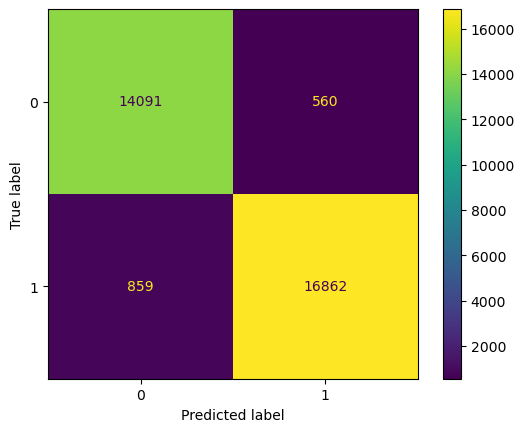

In [39]:
# Construct and display your confusion matrix.

def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Returns a plot of confusion matrix for predictions on y data.
    ''' 
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
  
    disp.plot()
    plt.show()
    
# Construct the confusion matrix for your predicted and test values.

### YOUR CODE HERE ###

# Create the display for your confusion matrix.

### YOUR CODE HERE ###

# Plot the visual in-line.

### YOUR CODE HERE ###
conf_matrix_plot(xgb_cv, X_test, y_test)


**Question:** When observing your confusion matrix, what do you notice? Does this correlate to any of your other calculations?

yes:
the coorect predictions (diagonal left to right)
are considerable higher than the incorrect predictions.

### Visualize most important features

`xgboost` has a built-in function to visualize the relative importance of the features in the model using `matplotlib`. Output and examine the feature importance of your model.

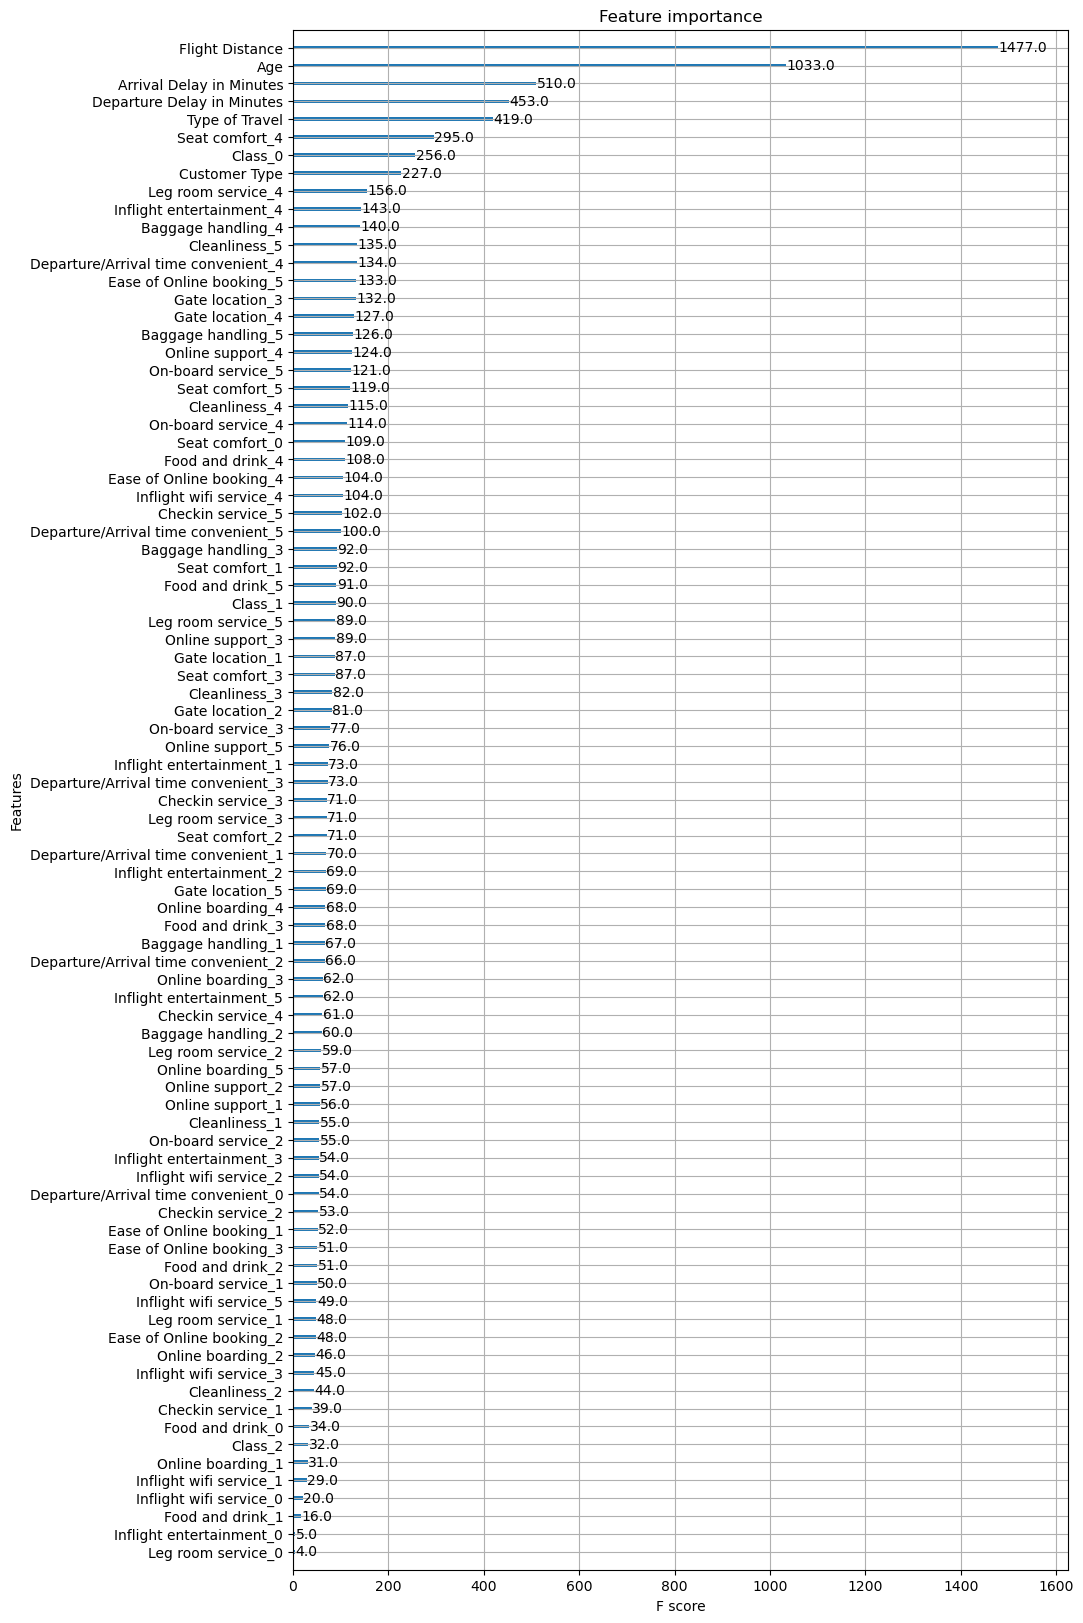

In [44]:
# Plot the relative feature importance of the predictor variables in your model.

### YOUR CODE HERE ###


fig, ax = plt.subplots(figsize=(10, 20))
plot_importance(xgb_cv.best_estimator_, ax=ax)
plt.show()

**Question:** Examine the feature importances outputted above. What is your assessment of the result? Did anything surprise you?

- By a wide margin, "seat comfort" rated as most important in the model.The type of seating is very different between first class and coach seating. However, the perks of being in first class also go beyond the seating type, so perhaps that is an underlying explanation of this feature's importance.
- Surprisingly, delays (both arrival and departure) did not score as highly important.

### Compare models

Create a table of results to compare model performance.

In [47]:
# Create a table of results to compare model performance.

### YOUR CODE HERE ###
def make_results(model_name, model_object):
    """
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    """

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.loc[cv_results['mean_test_f1'].idxmax()]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results['mean_test_f1']
    recall = best_estimator_results['mean_test_recall']
    precision = best_estimator_results['mean_test_precision']
    accuracy = best_estimator_results['mean_test_accuracy']

    # Create table of results
    table = pd.DataFrame({
        'Model': model_name,
        'F1': f1,
        'Recall': recall,
        'Precision': precision,
        'Accuracy': accuracy
    }, index=[0])

    return table

xgb_cv_results = make_results('XGBoost2 CV', xgb_cv)
#rf_cv_results = make_results('Random Forest CV', rf_cv)


In [50]:
## Read in master results table

results = pd.read_csv(loc2+'results1.csv')#, index_col=0)
results.reset_index()

## append New results
results = pd.concat([xgb_cv_results, results])
results

,Model,F1,Recall,Precision,Accuracy
0,XGBoost2 CV,0.960503,0.952653,0.968486,0.957113
0,Random Forest CV,0.581368,0.474484,0.754306,0.860933
1,XGBoost CV,0.583772,0.479719,0.749306,0.860933
2,tunedDecisionTree,0.511772,0.443737,0.608755,0.828400


**Question:** How does this model compare to the decision tree and random forest models you built in previous labs? 

**Question:** How does this model compare to the decision tree and random forest models you built in previous labs? 

Based on the results shown in the table above, the F1, precision, recall, and accuracy scores of the XGBoost model are similar to the corresponding scores of the decision tree and random forest models. The random forest model seemed to outperform the decision tree model as well as the XGBoost model. 

## Considerations

**What are some key takeaways you learned from this lab?**
- The evaluation of the model is important to inform if the model has delivered accurate predictions.
- Splitting the data is important for ensuring that there is new data for the model to test its predictive performance.
- Each metric provides an evaluation from a different standpoint, and accuracy alone is not a strong way to evaluate a model.
- Effective assessments balance the true/false positives versus true/false negatives through the confusion matrix and F1 score.

**How would you share your findings with your team?**
- Showcase the data used to create the prediction and the performance of the model overall.
- Review the sample output of the features and the confusion matrix to reference the model's performance.
- Highlight the metric values, emphasizing the F1 score.
- Visualize the feature importance to showcase what drove the model's predictions.

**What would you share with and recommend to stakeholders?**
- The model created is highly effective at predicting passenger satisfaction.
- The feature importance of seat comfort warrants additional investigation. It will be important to ask domain experts why they believe this feature scores so highly in this model.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged